#**Template Matching**

OpenCV has a function, cv2.MatchTemplate() that supports template matching to identify the target image.

Template Matching is the idea of sliding a target image(template) over a source image (input). The template is compared to the input. A match is determined by the how much the neighbourhood pixels in the input matches with the template.







There are various methods as to how the calculation of similarity is determined. For this example, we will be using TM.CCOEFF_NORMED

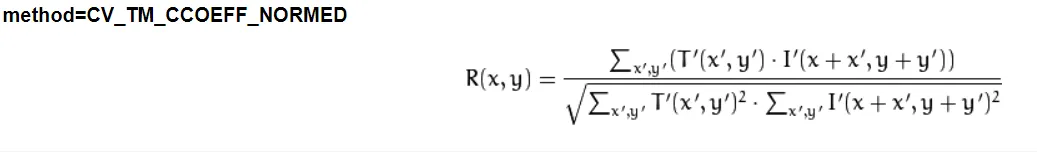

The template patch is slid over the input with this matrix and it determines a score that will indicate whether there is a match. TM_CCOEFF_NORMED finds the average value of the template and matches it to the average of the input. A score of 1 is a perfect match, -1 is a bad match and 0 is neutral.

Now we will use the given image as input for finding Waldo. (Finding-Waldo is a popular puzle game where we have to find Waldo in an image of multitude of different characters).

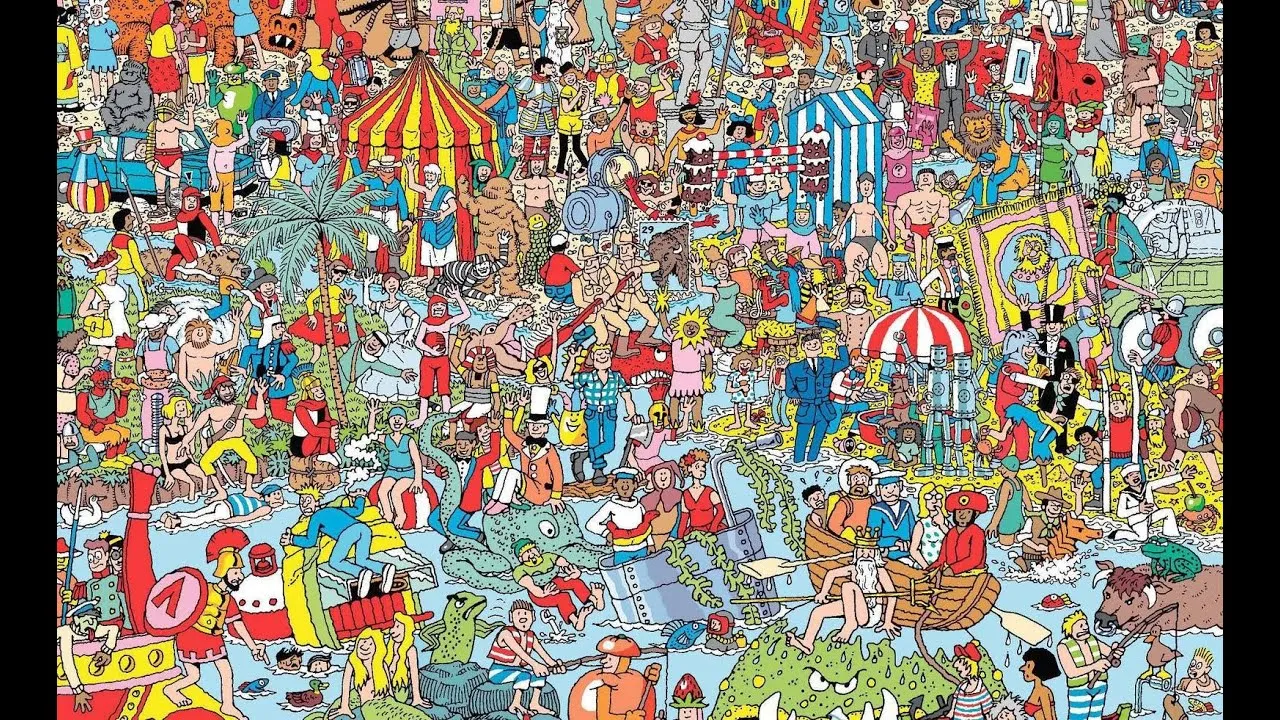

Below is Waldo himslf and we will use this image as a template to find him in this input image.

1_ZfDl6V4zC1_LaIwVDXeryA.webp

In [6]:
#importing all important modules
import cv2
import numpy as np

In [7]:
#reducing dimensionality and complexity of the image

img_rgb = cv2.imread('input_img.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('waldo.jpg',0)

#saves the width and height of the template into 'w' and 'h'

w, h = template.shape[::-1]

In [8]:
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.6
# finding the values where it exceeds the threshold

In [9]:
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    #draw rectangle on places where it exceeds threshold
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,0), 2)
cv2.imwrite('output.png',img_rgb)

True

#Remarks

Simple template matching is unable to operate on rotated images, flipped images or images in any other orientation.

We have to do multiscaling to consider such effects.